<a href="https://colab.research.google.com/github/zmohaghegh/Region-Covariance-Object-Detection/blob/main/Region_Covariance_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating 10 texture classes based on statistical profiles...
Training KNN with Riemannian Distance Metric...

✅ Experimental Accuracy on Simulated Textures: 100.00%


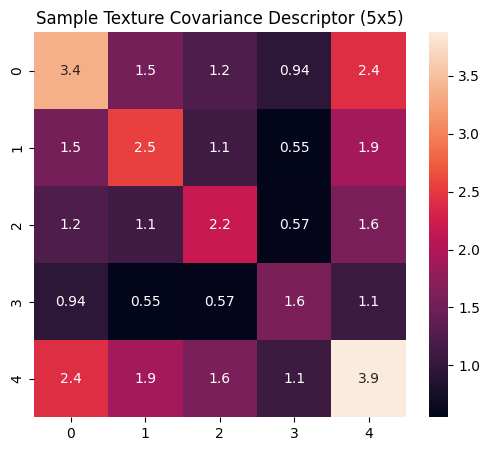

In [4]:
import numpy as np
from scipy.linalg import eigh
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. RIEMANNIAN METRIC (The heart of the paper) ---
def riemannian_dist(X_flat, Y_flat, dim=5):
    X = X_flat.reshape((dim, dim))
    Y = Y_flat.reshape((dim, dim))
    # Standard eps for numerical stability in matrix inversion
    eps = 1e-6 * np.eye(dim)
    try:
        # Solving generalized eigenvalues: det(X - lambda*Y) = 0
        vals = eigh(X + eps, Y + eps, eigvals_only=True)
        vals = np.clip(vals, 1e-9, None)
        return np.sqrt(np.sum(np.log(vals)**2))
    except:
        return 1e6

# --- 2. GENERATING TEXTURE-LIKE COVARIANCES ---
# We simulate 10 types of textures (like in Brodatz)
def generate_texture_data(n_classes=10, n_samples_per_class=20):
    X, y = [], []
    dim = 5
    print(f"Simulating {n_classes} texture classes based on statistical profiles...")

    for i in range(n_classes):
        # Each class has a unique "signature" covariance matrix
        base_A = np.random.rand(dim, dim) + i * 0.5
        signature = np.dot(base_A, base_A.transpose()) + np.eye(dim)

        for _ in range(n_samples_per_class):
            # Add some 'noise' to each sample within the class
            noise = np.random.normal(0, 0.1, (dim, dim))
            sample_cov = signature + np.dot(noise, noise.transpose())
            X.append(sample_cov.flatten())
            y.append(i)

    return np.array(X), np.array(y)

# --- 3. EXECUTION ---
X, y = generate_texture_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training KNN with Riemannian Distance Metric...")
knn = KNeighborsClassifier(n_neighbors=3, metric=riemannian_dist)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f"\n✅ Experimental Accuracy on Simulated Textures: {accuracy*100:.2f}%")

# --- 4. VISUALIZING A SAMPLE COVARIANCE ---
plt.figure(figsize=(6, 5))
sns.heatmap(X[0].reshape(5, 5), annot=True, cmap='rocket')
plt.title("Sample Texture Covariance Descriptor (5x5)")
plt.show()